### Import Packages

In [148]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Import Data

In [30]:
train_data = pd.read_csv("car.data", header=None)
train_data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [ ]:
train_data.head()

In [ ]:
len(train_data)

#### Modify buying

1 - vhigh <br>
2 - high <br>
3 - med <br>
4 - low <br>

In [ ]:
train_data['buying'].unique()

In [34]:
new_buying = []
for i in range(0, len(train_data)) :
    if train_data['buying'][i] == 'vhigh' :
        new_buying.append(1)
    elif train_data['buying'][i] == 'high' :
        new_buying.append(2)
    elif train_data['buying'][i] == 'med' :
        new_buying.append(3)
    elif train_data['buying'][i] == 'low' :
        new_buying.append(4)
train_data['buying'] = new_buying

#### Modify maint

1 - vhigh <br>
2 - high <br>
3 - med <br>
4 - low <br>

In [35]:
train_data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [36]:
new_maint = []
for i in range(0, len(train_data)) :
    if train_data['maint'][i] == 'vhigh' :
        new_maint.append(1)
    elif train_data['maint'][i] == 'high' :
        new_maint.append(2)
    elif train_data['maint'][i] == 'med' :
        new_maint.append(3)
    elif train_data['maint'][i] == 'low' :
        new_maint.append(4)
train_data['maint'] = new_maint

#### Modify doors

5 - 5more

In [52]:
train_data['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [72]:
new_doors = []
for i in range(0, len(train_data)) :
    if train_data['doors'][i] == '5more' :
        new_doors.append(5)
    else :
        new_doors.append(int(train_data['doors'][i]))
train_data['doors'] = new_doors

#### Modify persons
5 = more

In [53]:
train_data['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [73]:
new_persons = []
for i in range(0, len(train_data)) :
    if train_data['persons'][i] == 'more' :
        new_persons.append(5)
    else :
        new_persons.append(int(train_data['persons'][i]))
train_data['persons'] = new_persons

####  Modify lug_boot

1 = big <br>
2 = med <br>
3 - small <br>

In [37]:
train_data['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [38]:
new_lug_boot = []
for i in range(0, len(train_data)) :
    if train_data['lug_boot'][i] == 'big' :
        new_lug_boot.append(1)
    elif train_data['lug_boot'][i] == 'med' :
        new_lug_boot.append(2)
    elif train_data['lug_boot'][i] == 'small' :
        new_lug_boot.append(3)
train_data['lug_boot'] = new_lug_boot

#### Modify safety

1- high <br>
2 - med <br>
3 - low <br>

In [39]:
train_data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [40]:
new_safety = []
for i in range(0, len(train_data)) :
    if train_data['safety'][i] == 'high' :
        new_safety.append(1)
    elif train_data['safety'][i] == 'med' :
        new_safety.append(2)
    elif train_data['safety'][i] == 'low' :
        new_safety.append(3)
train_data['safety'] = new_safety

#### Modify class

1 - vgood <br>
2 - good <br>
3 - acc <br>
4 - unacc <br>

In [41]:
train_data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [42]:
new_class = []
for i in range(0, len(train_data)) :
    if train_data['class'][i] == 'vgood' :
        new_class.append(1)
    elif train_data['class'][i] == 'good' :
        new_class.append(2)
    elif train_data['class'][i] == 'acc' :
        new_class.append(3)
    elif train_data['class'][i] == 'unacc' :
        new_class.append(4)
train_data['class'] = new_class

#### New dataframe

In [74]:
train_data.head()

,buy_price,maint,doors,persons,lug_boot,safety,class
0,1,1,2,2,3,3,4
1,1,1,2,2,3,2,4
2,1,1,2,2,3,1,4
3,1,1,2,2,2,3,4
4,1,1,2,2,2,2,4


### Prepare logging dataframe

In [98]:
log_model = []
log_accuracy = []
log_precision = []
log_recall = []
log_cnf_matrix = []

def update_log(model, accuracy, precision, recall, cnf_matrix) :
    log_model.append(model)
    log_accuracy.append(accuracy)
    log_precision.append(precision)
    log_recall.append(recall)
    log_cnf_matrix.append(cnf_matrix)

### Results Preparation

In [99]:
def print_cnf_matrix(cnf_matrix) :
    class_names=[1, 2, 3, 4] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [100]:
def results(model_name, y_pred) :
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    update_log(model_name, accuracy, precision, recall, cnf_matrix)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Confusion Matrix:", cnf_matrix)
    
    print_cnf_matrix(cnf_matrix)

### Split data into Train and Test

In [101]:
X_train, X_test, y_train, y_test = train_test_split(train_data[['maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']], train_data['buying'], test_size=0.3, random_state=42)

### Model 1: Logistic Regression

Accuracy: 0.32947976878612717
Precision: 0.32947976878612717
Recall: 0.32947976878612717
Confusion Matrix: [[63 22 22 20]
 [57 23 31 22]
 [35 14 32 43]
 [38 11 33 53]]


/Users/risalim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


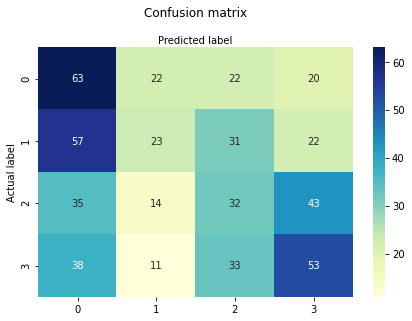

In [102]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

results("Logistic Regression", y_pred_logreg)

### Model 1: Logistic Regression (GridSearch)

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model_logreg_gs = GridSearchCV(model_logreg, grid, cv=10)
model_logreg_gs.fit(X_train, y_train)

In [127]:
print("tuned hpyerparameters: (best parameters) ", model_logreg_gs.best_params_)
print("accuracy :",model_logreg_gs.best_score_)

tuned hpyerparameters: (best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.3374724517906336


Accuracy: 0.32947976878612717
Precision: 0.32947976878612717
Recall: 0.32947976878612717
Confusion Matrix: [[63 22 22 20]
 [57 23 31 22]
 [35 14 32 43]
 [38 11 33 53]]


/Users/risalim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


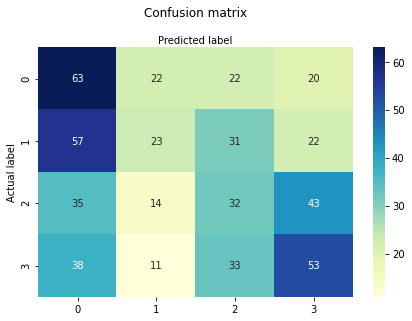

In [128]:
model_logreg_gs = LogisticRegression(C=1, penalty="l2")
model_logreg_gs.fit(X_train, y_train)
y_pred_logreg_gs = model_logreg_gs.predict(X_test)

results("Logistic Regression GridSearch (C=1, penalty='l2')", y_pred_logreg_gs)

### Model 2: K Nearest Neighbours (kNN)

Accuracy: 0.17341040462427745
Precision: 0.17341040462427745
Recall: 0.17341040462427745
Confusion Matrix: [[35 60 17 15]
 [64 20 31 18]
 [37 34 17 36]
 [46 30 41 18]]


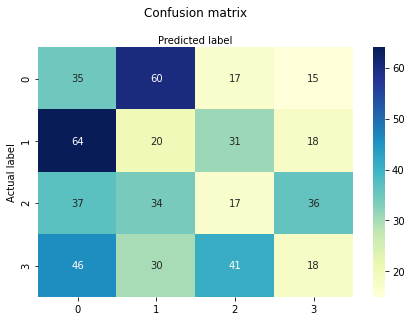

In [104]:
model_kNN = KNeighborsClassifier()
model_kNN.fit(X_train, y_train)
y_pred_kNN = model_kNN.predict(X_test)

results("K Nearest Neighbours", y_pred_kNN)

### Model 3: Gradient Boosting

Accuracy: 0.11560693641618497
Precision: 0.11560693641618497
Recall: 0.11560693641618497
Confusion Matrix: [[16 57 26 28]
 [50  8 44 31]
 [28 32 12 52]
 [27 27 57 24]]


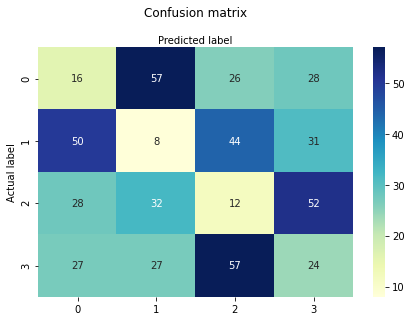

In [107]:
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

results("Gradient Boosting", y_pred_gb)

### Model 4: Random Forest

Accuracy: 0.07321772639691715
Precision: 0.07321772639691715
Recall: 0.07321772639691715
Confusion Matrix: [[11 59 34 23]
 [48  2 49 34]
 [27 32  8 57]
 [27 24 67 17]]


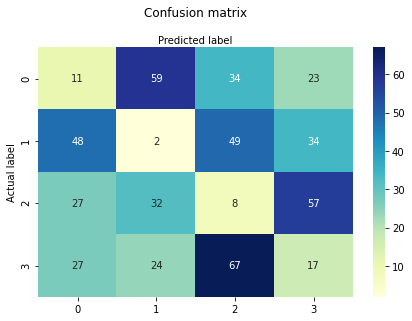

In [109]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

results("Random Forest", y_pred_rf)

### Model 5: Naive Bayes

Accuracy: 0.3044315992292871
Precision: 0.3044315992292871
Recall: 0.3044315992292871
Confusion Matrix: [[102   3  13   9]
 [101   1  25   6]
 [ 70   2  22  30]
 [ 79   0  23  33]]


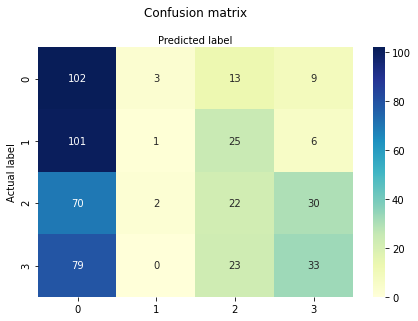

In [111]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

results("Naive Bayes", y_pred_nb)

### Model 6: Support Vector Machines (SVM)

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 0.3333333333333333
Confusion Matrix: [[72 16 18 21]
 [68 20 25 20]
 [43 12 33 36]
 [43  1 43 48]]


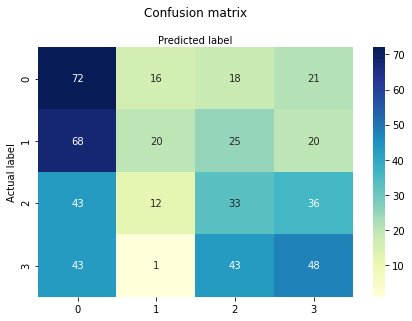

In [113]:
model_svm_linear = SVC(kernel='linear')
model_svm_linear.fit(X_train, y_train)
y_pred_svm_linear = model_svm_linear.predict(X_test)

results("Linear SVM", y_pred_svm_linear)

Accuracy: 0.26011560693641617
Precision: 0.26011560693641617
Recall: 0.26011560693641617
Confusion Matrix: [[47 23 26 31]
 [44 15 45 29]
 [27 14 28 55]
 [33  6 51 45]]


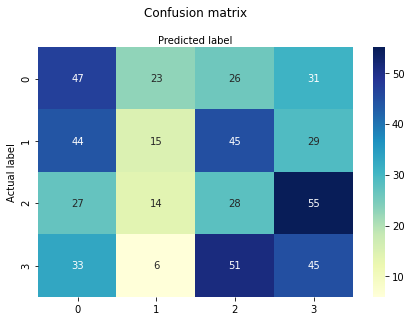

In [115]:
model_svm_poly = SVC(kernel='poly')
model_svm_poly.fit(X_train, y_train)
y_pred_svm_poly = model_svm_poly.predict(X_test)

results("Polynomial SVM", y_pred_svm_poly)

Accuracy: 0.23892100192678228
Precision: 0.23892100192678228
Recall: 0.23892100192678228
Confusion Matrix: [[  0   0 127   0]
 [  0   0 133   0]
 [  0   0 124   0]
 [  0   0 135   0]]


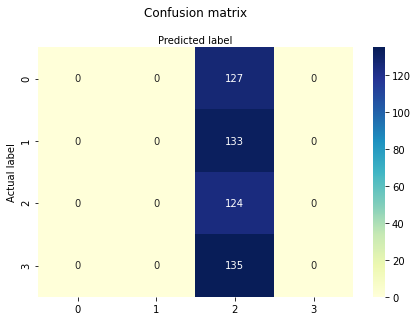

In [116]:
model_svm_sigmoid = SVC(kernel='sigmoid')
model_svm_sigmoid.fit(X_train, y_train)
y_pred_svm_sigmoid = model_svm_sigmoid.predict(X_test)

results("Sigmoid SVM", y_pred_svm_sigmoid)

Accuracy: 0.26011560693641617
Precision: 0.26011560693641617
Recall: 0.26011560693641617
Confusion Matrix: [[55 25 20 27]
 [64 17 32 20]
 [40 15 24 45]
 [54  5 37 39]]


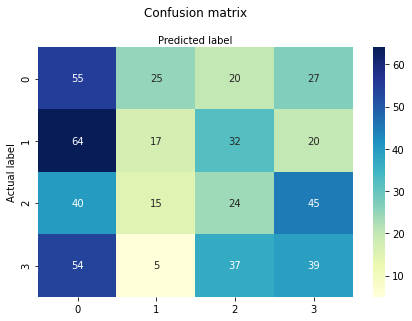

In [117]:
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = model_svm_rbf.predict(X_test)

results("RBF SVM", y_pred_svm_rbf)

### Model 6: Support Vector Machines (SVM) GridSearch

In [131]:
# defining parameter range 
param_grid = {'C': [10, 20, 50, 60, 70, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV 2/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV 3/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV 4/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV 5/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV 1/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 2/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 3/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 4/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 5/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 1/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.1s
[CV 2/5] END ................C=10, gamma=0.01, 

[CV 2/5] END ...................C=70, gamma=1, kernel=linear; total time=   0.2s
[CV 3/5] END ...................C=70, gamma=1, kernel=linear; total time=   0.2s
[CV 4/5] END ...................C=70, gamma=1, kernel=linear; total time=   0.2s
[CV 5/5] END ...................C=70, gamma=1, kernel=linear; total time=   0.2s
[CV 1/5] END .................C=70, gamma=0.1, kernel=linear; total time=   0.2s
[CV 2/5] END .................C=70, gamma=0.1, kernel=linear; total time=   0.2s
[CV 3/5] END .................C=70, gamma=0.1, kernel=linear; total time=   0.2s
[CV 4/5] END .................C=70, gamma=0.1, kernel=linear; total time=   0.2s
[CV 5/5] END .................C=70, gamma=0.1, kernel=linear; total time=   0.2s
[CV 1/5] END ................C=70, gamma=0.01, kernel=linear; total time=   0.2s
[CV 2/5] END ................C=70, gamma=0.01, kernel=linear; total time=   0.2s
[CV 3/5] END ................C=70, gamma=0.01, kernel=linear; total time=   0.2s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 20, 50, 60, 70, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [132]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


Accuracy: 0.33140655105973027
Precision: 0.33140655105973027
Recall: 0.33140655105973027
Confusion Matrix: [[72 16 18 21]
 [68 20 24 21]
 [43 12 32 37]
 [43  1 43 48]]


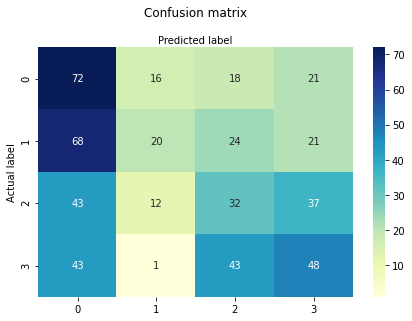

In [133]:
model_svm_linear_gs = SVC(kernel='linear', C=10, gamma=1)
model_svm_linear_gs.fit(X_train, y_train)
y_pred_svm_linear_gs = model_svm_linear_gs.predict(X_test)

results("Linear SVM GridSearch (C=10, gamma=1)", y_pred_svm_linear_gs)

### Summary of Results

In [134]:
results = pd.DataFrame({"model": log_model, 
              "accuracy": log_accuracy, 
              "precision": log_precision, 
              "recall": log_recall, 
              "cnf_matrix": log_cnf_matrix})

In [137]:
results.sort_values(by='accuracy', ascending=False)

,model,accuracy,precision,recall,cnf_matrix
5,Linear SVM,0.333333,0.333333,0.333333,"[[72, 16, 18, 21], [68, 20, 25, 20], [43, 12, ..."
10,"Linear SVM GridSearch (C=10, gamma=1)",0.331407,0.331407,0.331407,"[[72, 16, 18, 21], [68, 20, 24, 21], [43, 12, ..."
0,Logistic Regression,0.329480,0.329480,0.329480,"[[63, 22, 22, 20], [57, 23, 31, 22], [35, 14, ..."
9,"Logistic Regression GridSearch (C=1, penalty='...",0.329480,0.329480,0.329480,"[[63, 22, 22, 20], [57, 23, 31, 22], [35, 14, ..."
4,Naive Bayes,0.304432,0.304432,0.304432,"[[102, 3, 13, 9], [101, 1, 25, 6], [70, 2, 22,..."
6,Polynomial SVM,0.260116,0.260116,0.260116,"[[47, 23, 26, 31], [44, 15, 45, 29], [27, 14, ..."
8,RBF SVM,0.260116,0.260116,0.260116,"[[55, 25, 20, 27], [64, 17, 32, 20], [40, 15, ..."
7,Sigmoid SVM,0.238921,0.238921,0.238921,"[[0, 0, 127, 0], [0, 0, 133, 0], [0, 0, 124, 0..."
1,K Nearest Neighbours,0.173410,0.173410,0.173410,"[[35, 60, 17, 15], [64, 20, 31, 18], [37, 34, ..."
2,Gradient Boosting,0.115607,0.115607,0.115607,"[[16, 57, 26, 28], [50, 8, 44, 31], [28, 32, 1..."


### Predict


#### Linear SVM

In [163]:
input_data = pd.DataFrame({"maint":[2], "doors":[4], "persons": [5], "lug_boot": [1], "safety": [1], "class": [2]})

In [164]:
model_svm_linear.predict(input_data)

array([3])

#### Linear SVM GridSearch

In [165]:
model_svm_linear_gs.predict(input_data)

array([3])

#### Logistic Regression

In [166]:
model_logreg.predict(input_data)

array([3])

persons is 2 and 4, buyprice is 4. if persons >5, buyprice is 3.

Modify buying
1 - vhigh
2 - high
3 - med
4 - low